In [1]:
import pandas as pd
import numpy as np
from matplotlib.colors import rgb2hex
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.cm import get_cmap
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import seaborn as sns

In [2]:

labels = pd.read_fwf("./UCI_HAR_Dataset/features.txt",header=None)
X_train = pd.read_fwf("./UCI_HAR_Dataset/train/X_train.txt",header=None)
X_train.columns = labels


y_train = pd.read_fwf("./UCI_HAR_Dataset/train/y_train.txt",header=None)
y_train = pd.Series(y_train[0])

X_test = pd.read_fwf("./UCI_HAR_Dataset/test/X_test.txt",header=None)
X_test.columns = labels

y_test = pd.read_fwf("./UCI_HAR_Dataset/test/y_test.txt",header=None)
y_test = pd.Series(y_test[0])

data = pd.concat([X_train,X_test])
y = pd.concat([y_train,y_test])


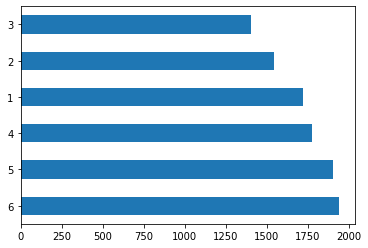

In [3]:
y.value_counts().plot(kind='barh')

As we can see our data is not perfectly balanced, but this should not be a problem

In [4]:
data.isna().sum().sum()

0

Fortunately we do not have any missing values so, we cannot move on to analyze our dataset

In [5]:
a = pd.Series([i[0] for i in data.columns]).str.contains('Gyro')
data_gyro = data[data.columns[a]]

In [6]:
b = pd.Series([i[0] for i in data.columns]).str.contains('Acc')
data_acc = data[data.columns[b]]

In [7]:
angle = data.columns.difference(data_gyro.columns.union(data_acc.columns))
data_angle = data[angle]

In [8]:
data.describe()

(1 tBodyAcc-mean()-X,)  (2 tBodyAcc-mean()-Y,)  (3 tBodyAcc-mean()-Z,)  \
count            10299.000000            10299.000000            10299.000000   
mean                 0.274881               -0.017743               -0.108925   
std                  0.065426                0.037128                0.053033   
min                 -1.000000               -1.000000               -1.000000   
25%                  0.262711               -0.024902               -0.121019   
50%                  0.277181               -0.017162               -0.108596   
75%                  0.288412               -0.010625               -0.097589   
max                  1.000000                1.000000                1.000000   

       (4 tBodyAcc-std()-X,)  (5 tBodyAcc-std()-Y,)  (6 tBodyAcc-std()-Z,)  \
count           10299.000000           10299.000000           10299.000000   
mean               -0.607784              -0.510191              -0.613064   
std                 0.438694               0.500240               0.403657   
min                -1.000000              -1.000000              -1.000000   
25%                -0.992360              -0.976990              -0.979137   
50%                -0.943030              -0.835032              -0.850773   
75%                -0.250293              -0.057336              -0.278737   
max                 1.000000               1.000000               1.000000   

       (7 tBodyAcc-mad()-X,)  (8 tBodyAcc-mad()-Y,)  (9 tBodyAcc-mad()-Z,)  \
count           10299.000000           10299.000000           10299.000000   
mean               -0.633593              -0.525697              -0.614989   
std                 0.413333               0.484201               0.399034   
min                -1.000000              -1.000000              -1.000000   
25%                -0.993293              -0.977017              -0.979064   
50%                -0.948244              -0.843670              -0.845068   
75%                -0.302033              -0.087405              -0.288149   
max                 1.000000               1.000000               1.000000   

       (10 tBodyAcc-max()-X,)  ...  (552 fBodyBodyGyroJerkMag-meanFre,)  \
count            10299.000000  ...                         10299.000000   
mean                -0.466732  ...                             0.126708   
std                  0.538707  ...                             0.245443   
min                 -1.000000  ...                            -1.000000   
25%                 -0.935788  ...                            -0.019481   
50%                 -0.874825  ...                             0.136245   
75%                 -0.014641  ...                             0.288960   
max                  1.000000  ...                             1.000000   

       (553 fBodyBodyGyroJerkMag-skewnes,)  \
count                         10299.000000   
mean                             -0.298592   
std                               0.320199   
min                              -1.000000   
25%                              -0.536174   
50%                              -0.335160   
75%                              -0.113167   
max                               1.000000   

       (554 fBodyBodyGyroJerkMag-kurtosi,)  \
count                         10299.000000   
mean                             -0.617700   
std                               0.308796   
min                              -1.000000   
25%                              -0.841847   
50%                              -0.703402   
75%                              -0.487981   
max                               1.000000   

       (555 angle(tBodyAccMean,gravity),)  \
count                        10299.000000   
mean                             0.007705   
std                              0.336591   
min                             -1.000000   
25%                             -0.124694   
50%                              0.008146   
75%                              0.149005   
max  

Data set is scaled to \[-1, 1\].

## PCA and t-SNE analysis

Before we delve deeply into our variables it is good to make a quick visualization using alghortims which can reduce
dimensiality of our dataset.

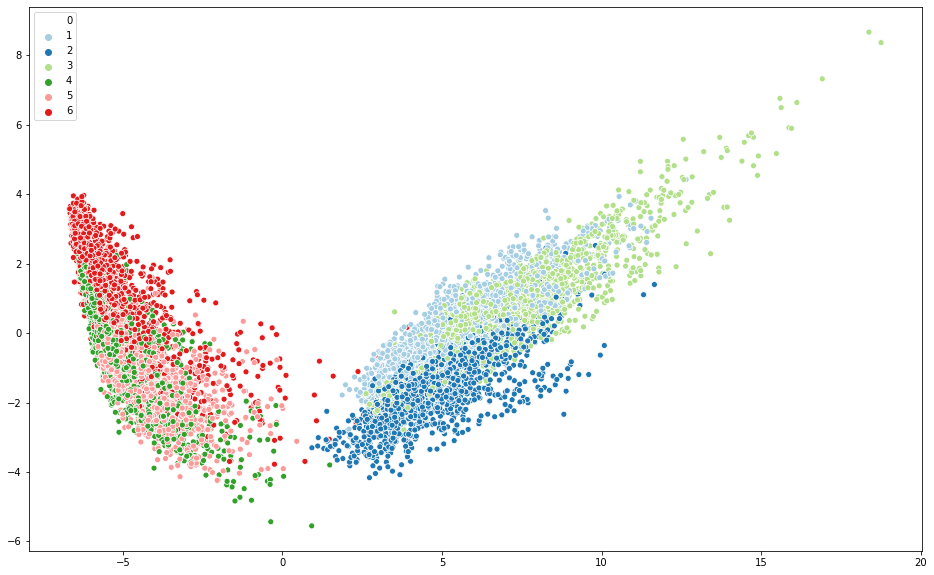

In [9]:
pca_data = data.copy()
cols = []
for i in range(len(data.columns)):
    cols.append(data.columns[i][0])
pca_data.columns = cols
pca_data.columns = pca_data.columns.str.replace('\d+', '').str.lstrip()
pca_data['activity'] = y
pca_data.pop('activity')


pca = PCA(n_components=2, random_state=3)
pca_data = pca.fit_transform(pca_data)
fig = plt.gcf()
fig.set_size_inches( 16, 10)
sns.scatterplot(pca_data[:,0],pca_data[:,1],hue=y,palette='Paired')

Data seems to be seperated in two big clouds.

Text(0, 0.5, 'cumulative explained variance')

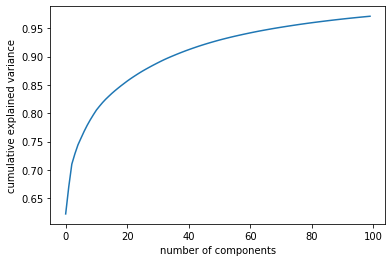

In [10]:
pca_data = data.copy()
cols = []
for i in range(len(data.columns)):
    cols.append(data.columns[i][0])
pca_data.columns = cols
pca_data.columns = pca_data.columns.str.replace('\d+', '').str.lstrip()
pca_data['activity'] = y
pca_data.pop('activity')


pca = PCA(n_components=100,random_state=3)
pca_data = pca.fit_transform(pca_data)
cum_ratio = (np.cumsum(pca.explained_variance_ratio_))

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

This plot shows how much variance our PCA transformation is able to keep with certain amount of components used.
Lets now move for more sophisticated attitude to problem of showing all our data on 2D plane.

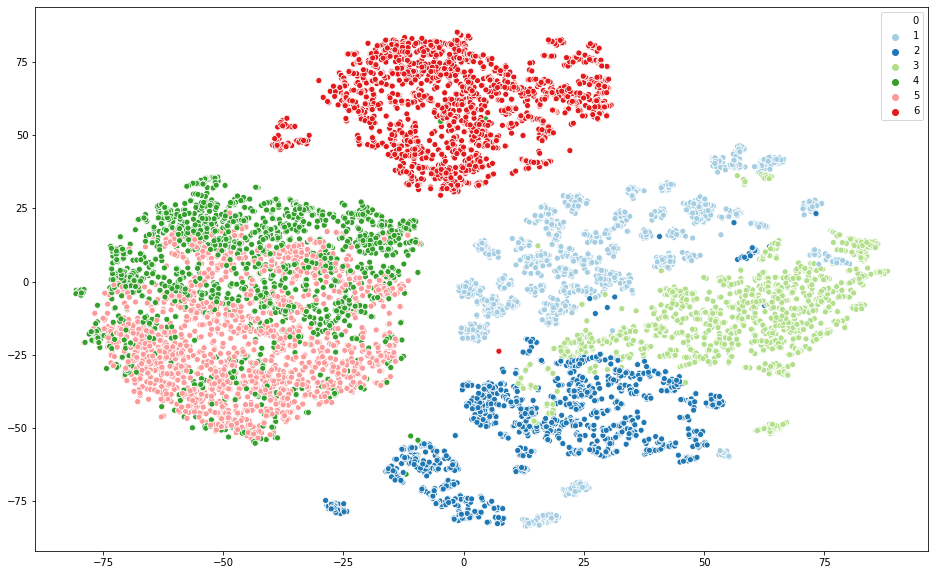

In [11]:
pca_data = data.copy()
cols = []
for i in range(len(data.columns)):
    cols.append(data.columns[i][0])
pca_data.columns = cols
pca_data.columns = pca_data.columns.str.replace('\d+', '').str.lstrip()
pca_data['activity'] = y
pca_data.pop('activity')


pca = PCA(n_components=0.9, random_state=3)
pca_data = pca.fit_transform(pca_data)

tsne = TSNE(random_state=3)
tsne_transformed = tsne.fit_transform(pca_data)

fig = plt.gcf()
fig.set_size_inches( 16, 10)
sns.scatterplot(tsne_transformed[:,0],tsne_transformed[:,1],hue=y,palette='Paired')

Fortunately our dataset seems to be quite easily seperatable, so our clustering task seems to be possible.

## Helper functions to plot data

In [12]:
def scatter_3D(df, y, title):
    """Function for 3D scatter plot from 3-col dataframe and labels vector"""
    fig = plt.figure(figsize=(10,10))
    ax = plt.axes(projection='3d')
    x = df.iloc[:, 0]
    y = df.iloc[:, 1]
    z = df.iloc[:, 2]
    ax.scatter3D(x, y, z, c = col_vec)
    plt.title(title)
    ax.set_xlabel('X direction')
    ax.set_ylabel('Y direction')
    ax.set_zlabel('Z direction')
    
#Color values for plots
colors = {'standing': 'yellow',
         'sitting': 'green',
         'laying': 'blue',
         'walking': 'orange',
         'walking_downstairs': 'brown',
         'walking_upstairs': 'red'}

#coding labels to descriptive values
labels = {1: "walking", 2: "walking_upstairs", 
          3: "walking_downstairs", 4: "sitting", 
          5: "standing", 6: "laying"}
y.replace(labels, inplace=True)
col_vec = y.apply(lambda x: colors[x])

def box_gr(vt, vf, title):
    """Function for grouped boxplots to compare variable with its fourier transform,
    among activity labels"""
    
    t = pd.Series(data_gyro[vf])
    yes = pd.Series(np.repeat('yes', len(data_gyro)))
    t = pd.concat([t.reset_index(drop=True), yes, y.reset_index(drop=True)], axis=1)
    t.columns = ['v', 'furier', 'g']    
    
    f = pd.Series(data_gyro[vt])
    no = pd.Series(np.repeat('no', len(data_gyro)))
    f = pd.concat([f.reset_index(drop=True), no, y.reset_index(drop=True)], axis=1)
    f.columns = ['v', 'furier', 'g']
    
    df = t.append(f)
    
    fig=plt.figure(figsize=(12, 8))
    sns.boxplot(data=df, x='g', y='v', hue='furier')
    plt.title(title)
    plt.xlabel("activity")
    plt.ylabel('value')
    
def box_acc(vt, vf, title):
    """Function for grouped boxplots to compare variable with its fourier transform,
    among activity labels"""
    
    t = pd.Series(data_acc[vf])
    yes = pd.Series(np.repeat('yes', len(data_acc)))
    t = pd.concat([t.reset_index(drop=True), yes, y.reset_index(drop=True)], axis=1)
    t.columns = ['v', 'furier', 'g']    
    
    f = pd.Series(data_acc[vt])
    no = pd.Series(np.repeat('no', len(data_acc)))
    f = pd.concat([f.reset_index(drop=True), no, y.reset_index(drop=True)], axis=1)
    f.columns = ['v', 'furier', 'g']
    
    df = t.append(f)
    
    fig=plt.figure(figsize=(12, 8))
    sns.boxplot(data=df, x='g', y='v', hue='furier')
    plt.title(title)
    plt.xlabel("activity")
    plt.ylabel('value')

# Acceleration

The features selected for that part of a dataset comes from accelerometer. Then signal was then separated into body and gravity 
acceleration signals (tBodyAcc-XYZ and tGravityAcc-XYZ).

In [13]:
data_acc = data.copy()
cols = []
for i in range(len(data.columns)):
    cols.append(data_acc.columns[i][0])
data_acc.columns = cols
data_acc.columns = data_acc.columns.str.replace('\d+', '').str.lstrip()
data_acc['activity'] = y



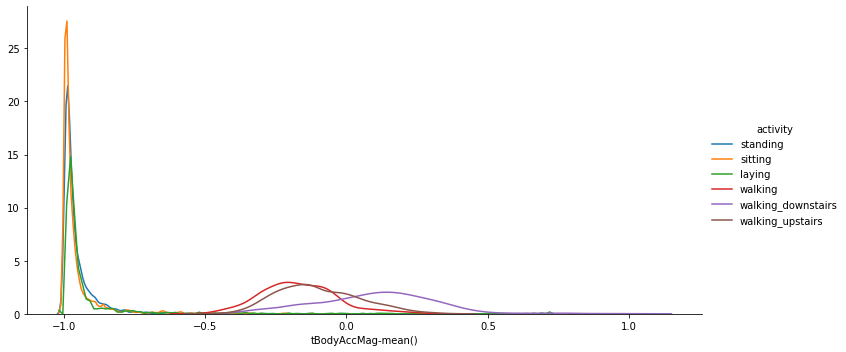

In [14]:
facetgrid = sns.FacetGrid(data_acc, hue='activity', height=5,aspect=2)
facetgrid.map(sns.distplot,'tBodyAccMag-mean()', hist=False).add_legend()

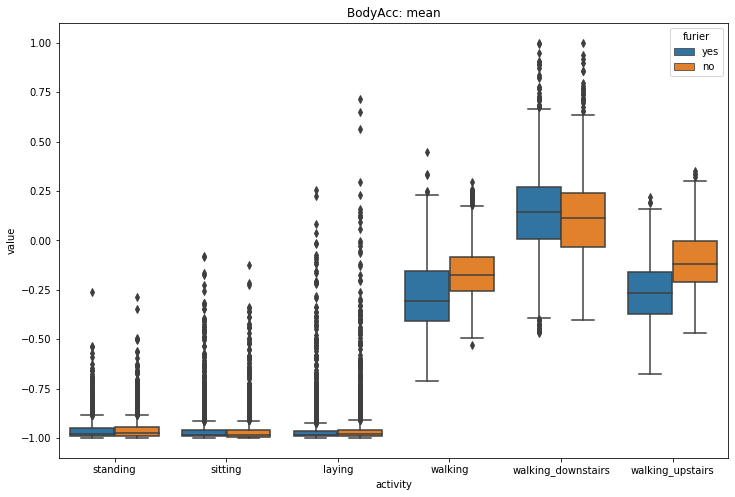

In [15]:
box_acc('tBodyAccMag-mean()', 'fBodyAccMag-mean()', "BodyAcc: mean")

At first glance it seems visible that activities which do not demand so much motion can be easily differed from these which demand motion.
Also fourier transform seems to change data, so that it becomes easier to cluster.

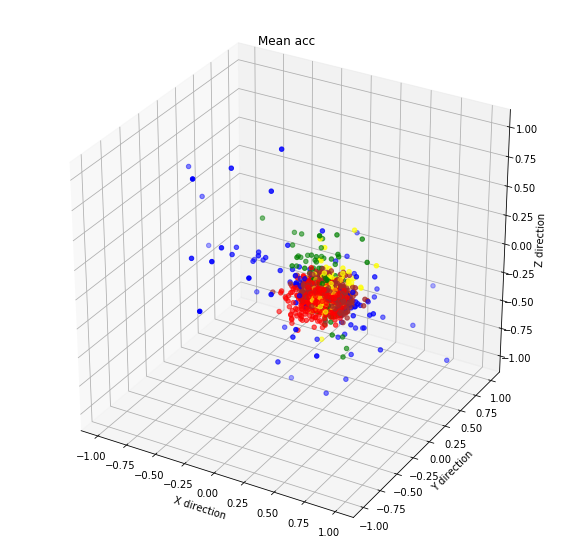

In [16]:
tBodyAcc_mean = data_acc[['tBodyAcc-mean()-X','tBodyAcc-mean()-Y','tBodyAcc-mean()-Z']]
scatter_3D(tBodyAcc_mean, y, "Mean acc")

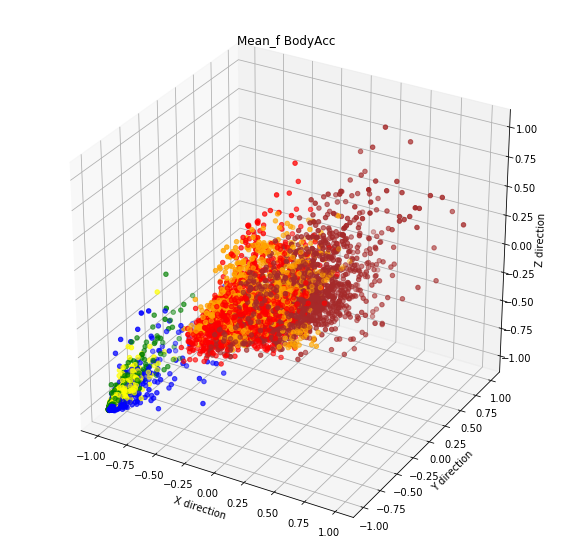

In [17]:
fBodyAcc_mean = data_acc[['fBodyAcc-mean()-X','fBodyAcc-mean()-Y','fBodyAcc-mean()-Z']]
scatter_3D(fBodyAcc_mean, y, "Mean_f BodyAcc")

The pattern from previous experiment seems to repeat here.

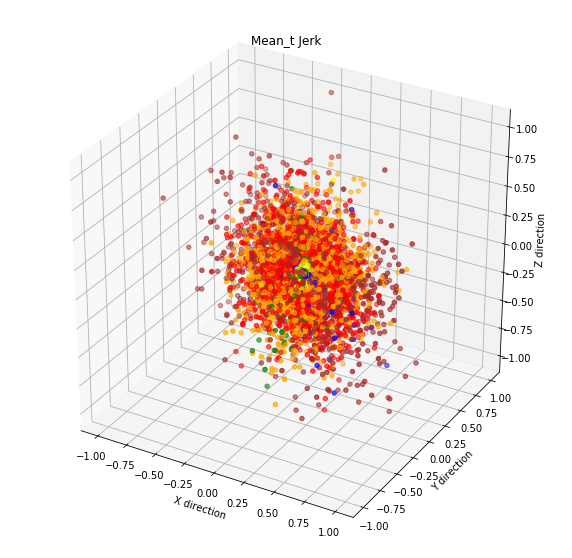

In [18]:
tJerk = data_acc[['tBodyAccJerk-mean()-X','tBodyAccJerk-mean()-Y','tBodyAccJerk-mean()-Z']]
scatter_3D(tJerk, y, "Mean_t Jerk")

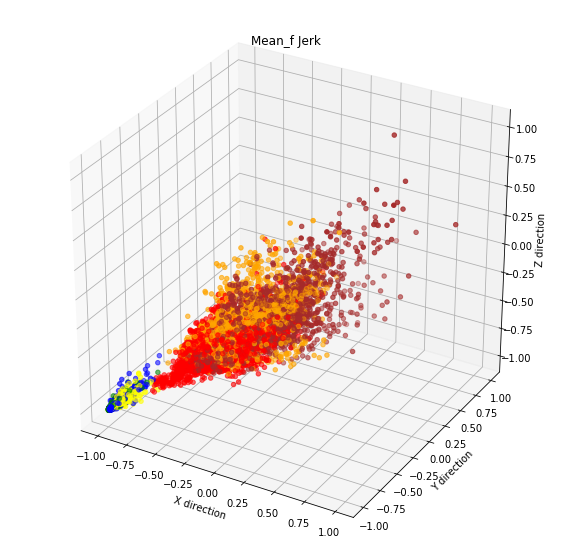

In [19]:
fJerk = data_acc[['fBodyAccJerk-mean()-X','fBodyAccJerk-mean()-Y','fBodyAccJerk-mean()-Z']]
scatter_3D(fJerk, y, "Mean_f Jerk")

# Gyrometer

Signal from gyrometer is diveded to 2.5 seconds intervals (frames). Each frame is represented with set of statistics (mean, std, energy, entropy etc.). Next jerk of signal was calculated (GyroJerk). After that magnitude of both signal and its jerk was calculated (GyroMag, GyroJerkMag). Finally all obtained variables were transformed with Furier transform (prefix "f"). Hence, only for gyroscope signal we have over 200 variables. 

In [20]:
data_gyro.columns

Index([          ('121 tBodyGyro-mean()-X',),
                 ('122 tBodyGyro-mean()-Y',),
                 ('123 tBodyGyro-mean()-Z',),
                  ('124 tBodyGyro-std()-X',),
                  ('125 tBodyGyro-std()-Y',),
                  ('126 tBodyGyro-std()-Z',),
                  ('127 tBodyGyro-mad()-X',),
                  ('128 tBodyGyro-mad()-Y',),
                  ('129 tBodyGyro-mad()-Z',),
                  ('130 tBodyGyro-max()-X',),
       ...
         ('547 fBodyBodyGyroJerkMag-sma()',),
       ('548 fBodyBodyGyroJerkMag-energy(',),
         ('549 fBodyBodyGyroJerkMag-iqr()',),
       ('550 fBodyBodyGyroJerkMag-entropy',),
       ('551 fBodyBodyGyroJerkMag-maxInds',),
       ('552 fBodyBodyGyroJerkMag-meanFre',),
       ('553 fBodyBodyGyroJerkMag-skewnes',),
       ('554 fBodyBodyGyroJerkMag-kurtosi',),
       ('557 angle(tBodyGyroMean,gravityM',),
       ('558 angle(tBodyGyroJerkMean,grav',)],
      dtype='object', length=213)

In [21]:
#Renaming clumns to their number only for easier work
data_gyro = data_gyro.rename(columns = lambda x : str(x)[2:5])

In [22]:
data = data.rename(columns = lambda x : str(x)[2:5])

### BodyGyro-mean X-Y-Z

Raw signal analysis. As it is measured in 3-dimensional space, we visualize its statistics in 3D scatter plots. Signal is compared to its Furier transform.

In [23]:
tBodyGyro_mean = data_gyro[['121','122','123']]

In [24]:
fBodyGyro_mean = data_gyro[['424', '425', '426']]

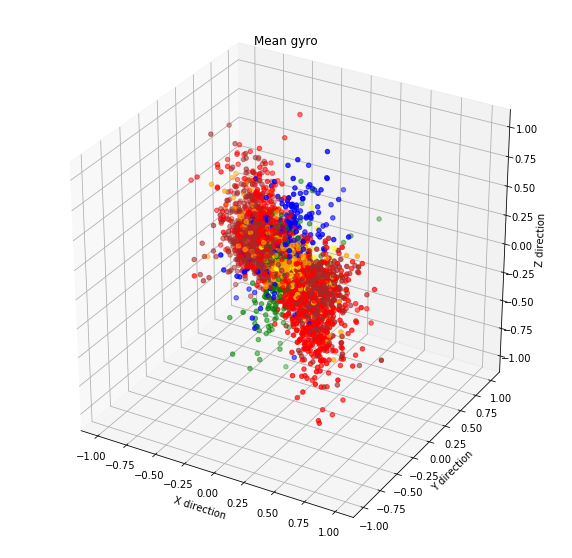

In [25]:
scatter_3D(tBodyGyro_mean, y, "Mean gyro")

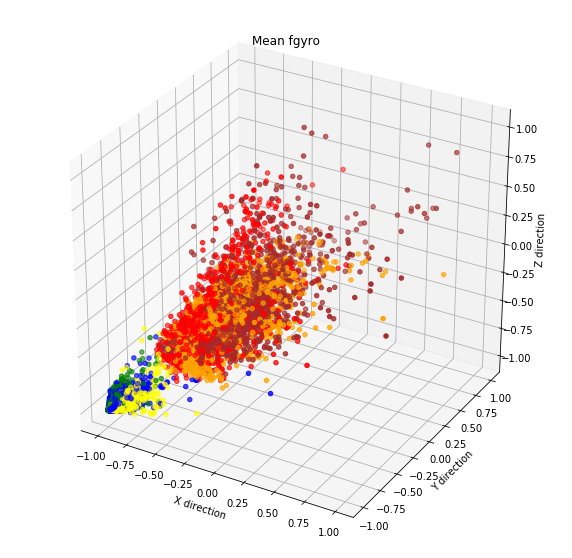

In [26]:
scatter_3D(fBodyGyro_mean, y, "Mean fgyro")

### BodyGyro-energy X-Y-Z

In [27]:
tBodyGyro_energy = data_gyro[['137', '138', '139']]

In [28]:
fBodyGyro_energy = data_gyro[['440', '441', '442']]

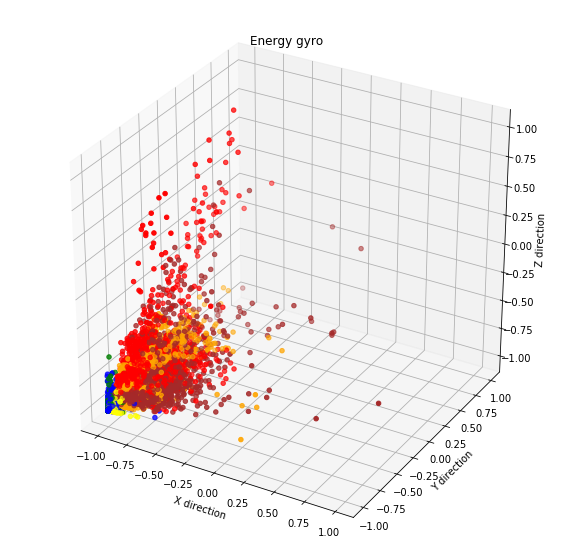

In [29]:
scatter_3D(tBodyGyro_energy, y, "Energy gyro")

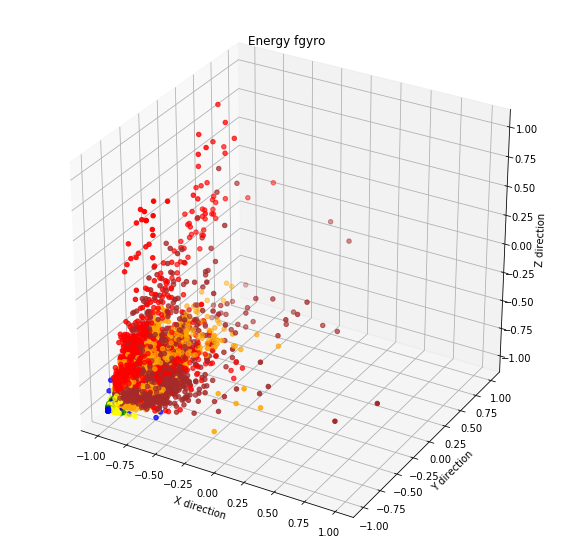

In [30]:
scatter_3D(fBodyGyro_energy, y, "Energy fgyro")

### BodyGyro-entropy X-Y-Z

In [31]:
tBodyGyro_entropy = data_gyro[['143','144','145']]

In [32]:
fBodyGyro_entropy = data_gyro[['446', '447', '448']]

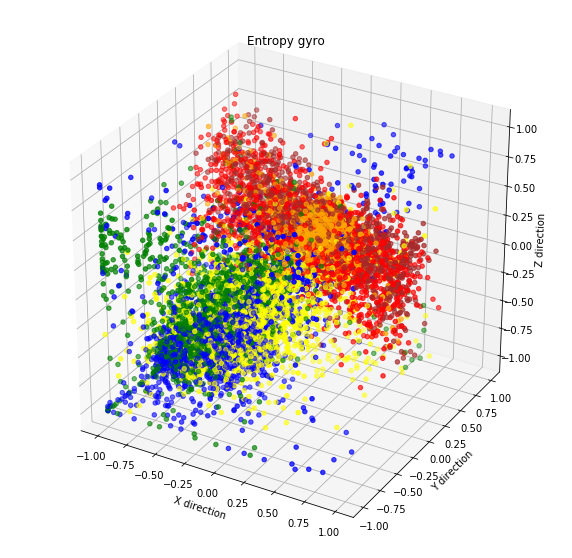

In [33]:
scatter_3D(tBodyGyro_entropy, y, "Entropy gyro")

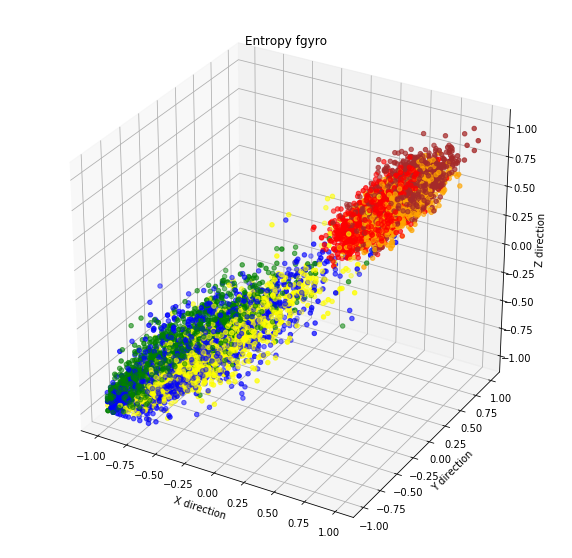

In [34]:
scatter_3D(fBodyGyro_entropy, y, "Entropy fgyro")

For raw signal Furier transform helps to obtain dataset with more separable groups of points which decribe different activities. Especially mean and entropy of Furier transformed signals shows interesting distribution of observations. Points have visible two groups: motion and no-motions activities.

### BodyGyroJerk-mean

Jerk ("zryw") is derivation of angular velocity measured by gyroscope. Furier transform is not applied, so we can observe only raw signal.

In [35]:
tBodyGyroJerk_mean = data_gyro[['161', '162', '163']]

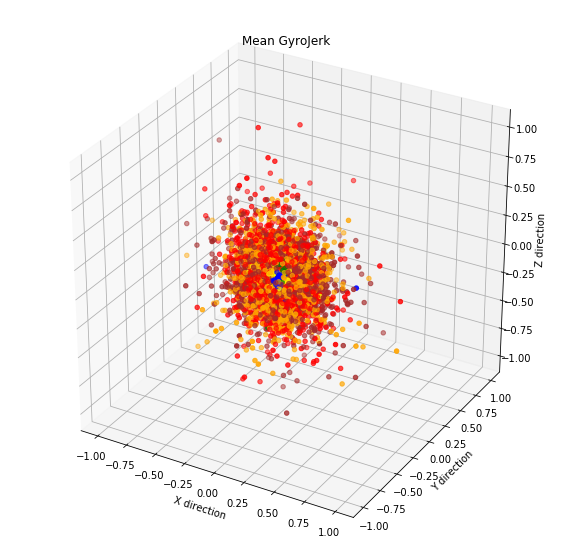

In [36]:
scatter_3D(tBodyGyroJerk_mean, y, "Mean GyroJerk")

### BodyGyroJerk-energy

In [37]:
tBodyGyroJerk_energy = data_gyro[['177', '178', '179']]

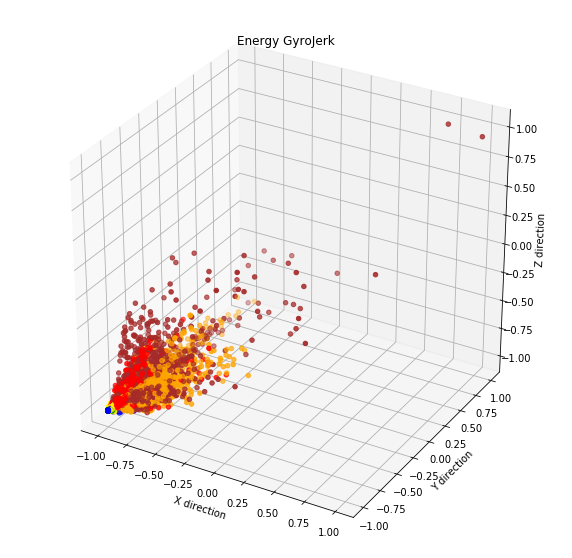

In [38]:
scatter_3D(tBodyGyroJerk_energy, y, "Energy GyroJerk")

### BodyGyroJerk-entropy

In [39]:
tBodyGyroJerk_entropy = data_gyro[['183', '184', '185']]

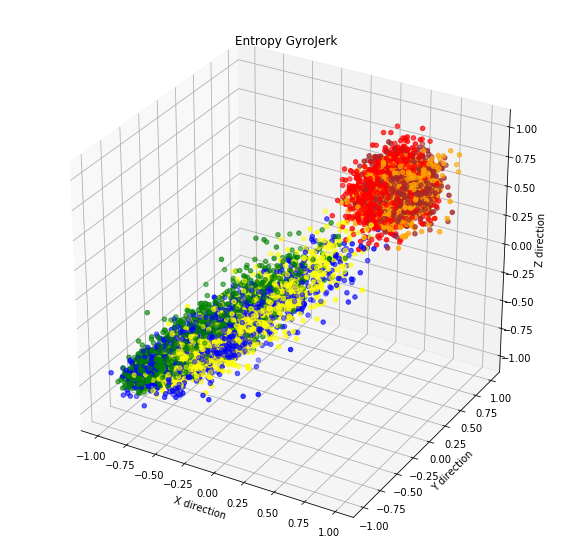

In [40]:
scatter_3D(tBodyGyroJerk_entropy, y, "Entropy GyroJerk")

Similar conlusions as for raw signal can be made. Entropy of jerk signal is the most useful. However, both jerk and raw signal do not provide enough differentiation among points to distinguish activities inside groups of motion and no-motion on plots.

## Gyrometer signls magnitude
Magnitude reduces signal to one-dimensional information so it can be visualized on boxplot to compare it among different activities. As it is also Furier transformed, two boxplots for each group are presented.

### BodyGyroMag-mean
First plots present magnitude analyize for raw signal.

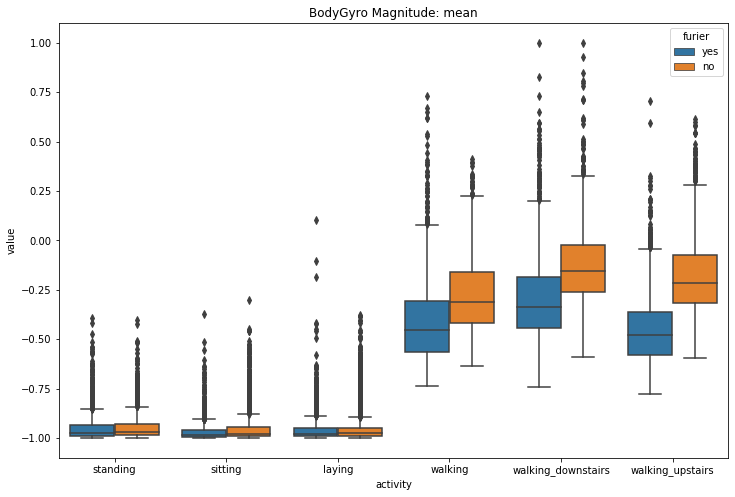

In [41]:
box_gr('240', '529', "BodyGyro Magnitude: mean")

### BodyGyroMag-energy

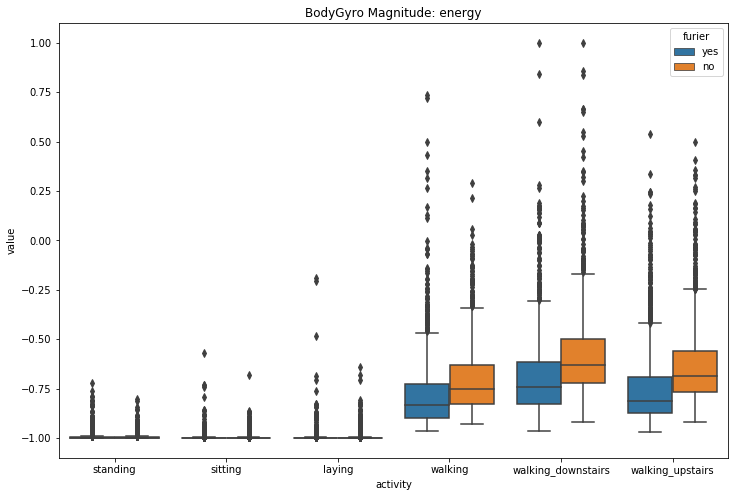

In [42]:
box_gr('246', '535', "BodyGyro Magnitude: energy")

### BodyGyroMag-entropy

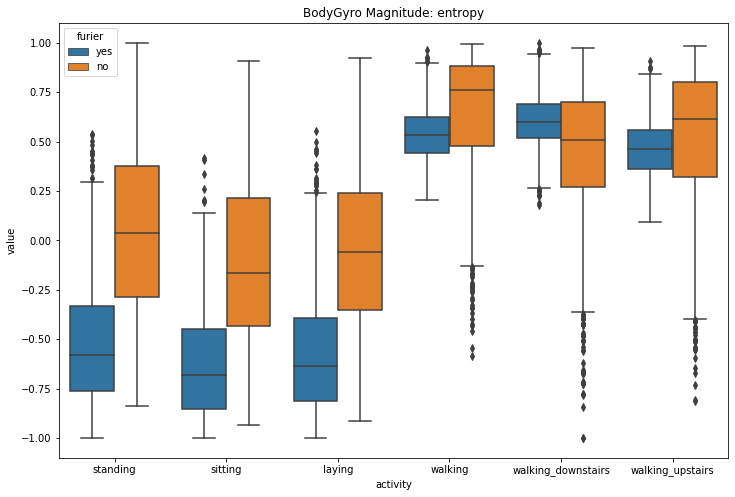

In [43]:
box_gr('248', '537', "BodyGyro Magnitude: entropy")

Definietly two groups are again observed. Motion and no-motion activities. However, it is impossible to distinguish activities in their groups.

### BodyGyroJerkMag - mean

Now magnitude of jerk signal is visualized.

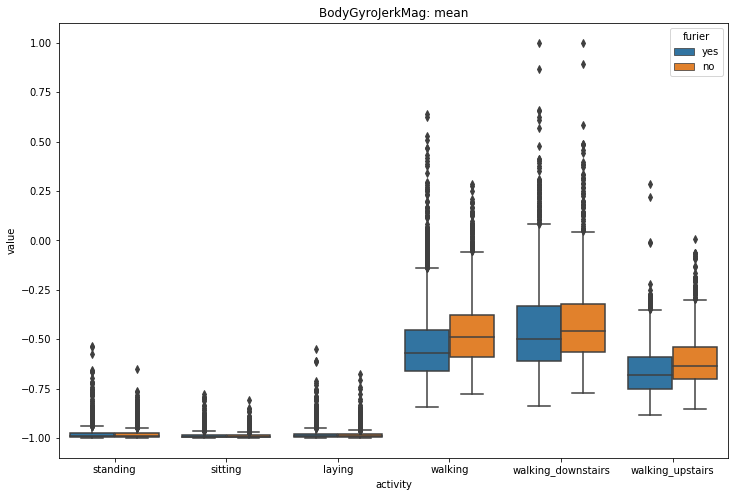

In [44]:
box_gr('253', '542', 'BodyGyroJerkMag: mean')

### BodyGyroJerkMag - energy

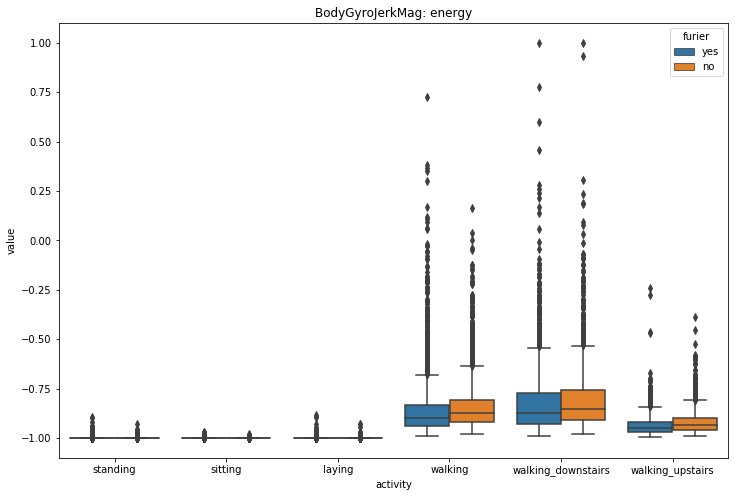

In [45]:
box_gr('259', '548', 'BodyGyroJerkMag: energy')

### BodyGyroJerkMag - entropy

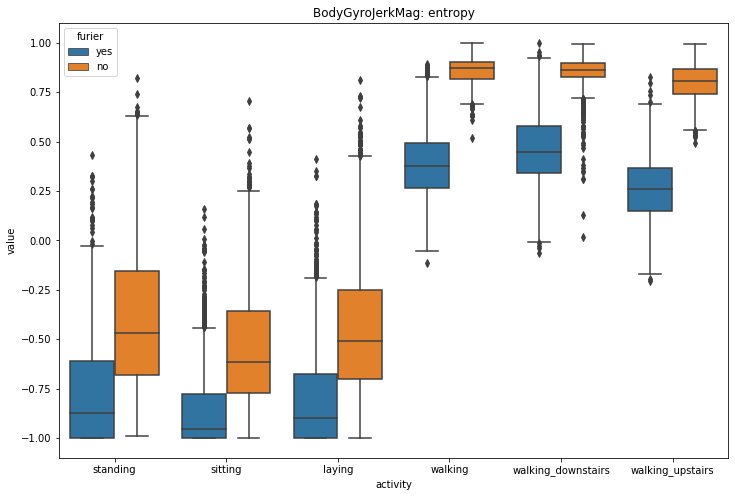

In [46]:
box_gr('261', '550', 'BodyGyroJerkMag: entropy')

Conclusions are similar to raw signal. Additional Furier transform seems to make distributions more concentrated.

## Correlations inside signal
As signal is represented in 3D, correlations between its statistics among dimension was computed. Plot below represents correlations of signal values among pairs of dimensions for each observation.

In [47]:
def scatter_3D_corr(df, y, title):
    fig = plt.figure(figsize=(10,10))
    ax = plt.axes(projection='3d')
    x = df.iloc[:, 0]
    y = df.iloc[:, 1]
    z = df.iloc[:, 2]
    ax.scatter3D(x, y, z, c = col_vec)
    plt.title(title)
    ax.set_xlabel('X-Y corr')
    ax.set_ylabel('X-Z corr')
    ax.set_zlabel('Y-Z corr')

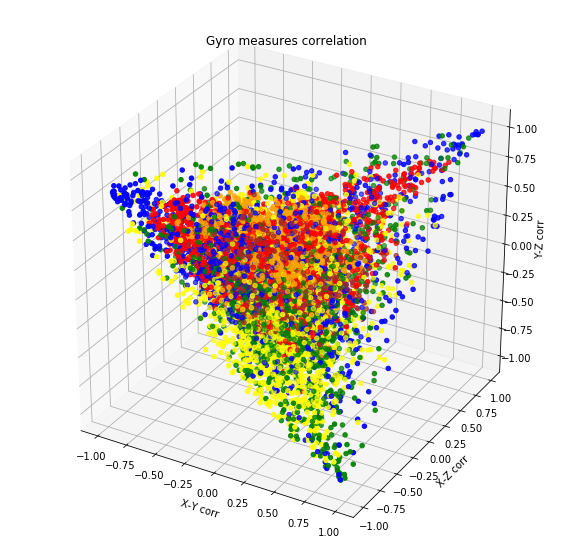

In [48]:

tBodyGyro_corr = data_gyro[['158', '159', '160']]
scatter_3D_corr(tBodyGyro_corr, y, "Gyro measures correlation")

We cannot make useful observations, but plot looks interesting anyway.

### Acc - Gyro signals magnitude relations
It seems difficult to find relations between gyroscope and accelerometer signals, because of its 3D-multistatistical characteristic. As reasonable approach we tried to find dependencies among signals magnitudes, as it is reduced to one-dimensional value. Plots below visualise ditributions of signal magnitude statistics on pairplots of accelerometer and gyroscope values.

In [49]:
def pair_scat(vacc, vgyro, title):
    sns.scatterplot(data = pd.concat([data[vacc], data_gyro[vgyro], y], axis=1),
               x = vacc, y = vgyro, hue = 0, legend = False)
    plt.xlabel("BodyGyro")
    plt.ylabel("BodyAcc")
    plt.title(title)

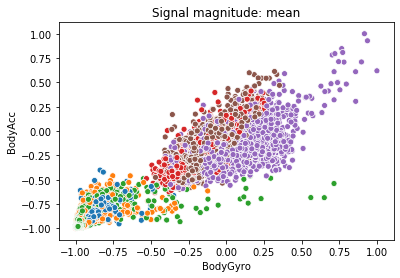

In [50]:
pair_scat('201', '240', "Signal magnitude: mean")

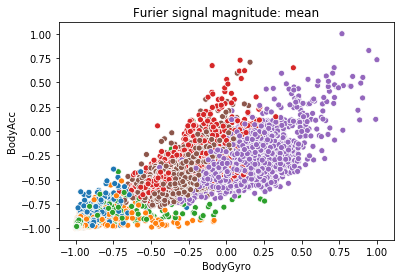

In [51]:
pair_scat('503', '529', "Furier signal magnitude: mean")

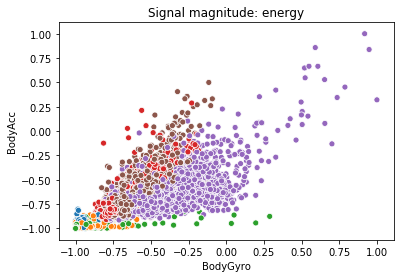

In [52]:
pair_scat('207', '246', "Signal magnitude: energy")

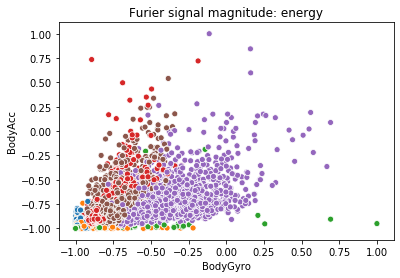

In [53]:
pair_scat('509', '535', "Furier signal magnitude: energy")

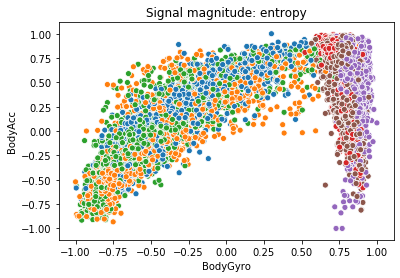

In [54]:
pair_scat('209', '248', "Signal magnitude: entropy")

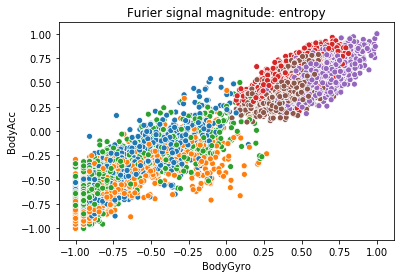

In [55]:
pair_scat('511', '537', "Furier signal magnitude: entropy")

Mean and entropy of signals from accelerometer and gyroscope seems to have visible correlation. This observation is compatible with our intuition, that measures from these two sensors should be somehow dependent.

### Correlations

In our dataset we have 561 variables, all numerical. Usual corrlation analysis is impossible. Correlation matrix presented below can only tell us, that in dataset are definietly many variables highly correlated.

In [56]:
corr_matrix = data.corr().abs()
corr = corr_matrix.unstack()
corr.sort_values(ascending = False, inplace=True)

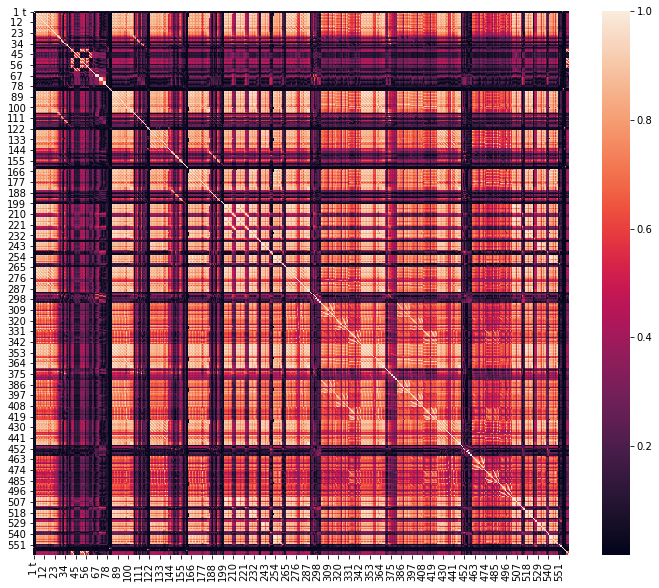

In [57]:
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix)

In [58]:
corr = pd.DataFrame(corr)
corr.reset_index(inplace=True)

In [59]:
#(561 over 2) correlations values for pairs of variables
corr_uni = corr[corr['level_0']!=corr['level_1']]
corr_uni = corr_uni.iloc[::2, :]
#Correlation values higher than 0.9
corr_uni_09 = corr_uni[corr_uni[0]>0.9]

Histogram below represents distribution of correlations values for all pairs of variables from our dataset. We have a lot of correlation values higher than 0.8. Additional information provide boxplot of this values.

Text(0.5, 0, 'value')

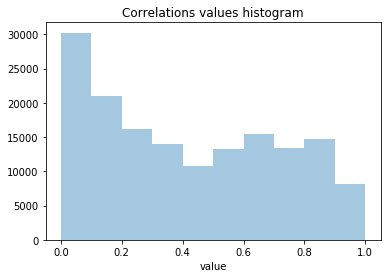

In [60]:
sns.distplot(corr_uni[0], kde=False, bins = 10)
plt.title("Correlations values histogram")
plt.xlabel("value")

Text(0.5, 0, 'value')

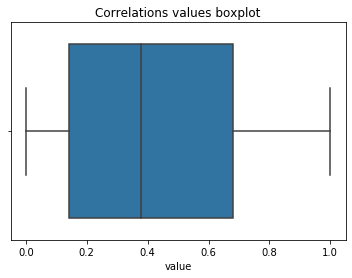

In [61]:
sns.boxplot(corr_uni[0])
plt.title("Correlations values boxplot")
plt.xlabel("value")

In [62]:
print(f"Number of pairs of variables with correlation higher than 0.9: {len(corr_uni_09)}")
print(f"Which is {len(corr_uni_09)*100/len(corr_uni):.1f}% of all pairs.")

Number of pairs of variables with correlation higher than 0.9: 8129
Which is 5.2% of all pairs.
